# THỰC HÀNH: KHAI PHÁ DỮ LIỆU TRÊN BỘ DỮ LIỆU CALIFORNIA HOUSING

## PHẦN I: CÂU HỎI:

### Câu 1: 
Trong tập dữ liệu California Housing, hãy kiểm tra xem vùng nào có số hộ gia đình (households) cao nhất. 

Giải thích tại sao cần biết đặc điểm phân bố này trước khi phân tích giá nhà.

### Câu 2:
So sánh thu nhập trung vị (median_income) giữa vùng ven biển (coastal) và nội địa (inland).

Nhận xét: thu nhập có khác biệt rõ rệt không, và điều này gợi ý gì về giá nhà?

### Câu 3:
Sử dụng Boxplot để phát hiện các outlier trong biến median_house_value.

Nhận xét: tại sao nhiều giá trị tập trung ở mức 500,000? Đây có phải lỗi dữ liệu không, và bạn sẽ xử lý thế nào (giữ nguyên, loại bỏ hay chuẩn hóa)?


## PHẦN II: THỰC HÀNH

## Bước 1: Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Chỉnh sửa cách hiển thị dữ liệu

# In ra tất cả các hàng
pd.set_option('display.max_rows', None)
# In ra tất cả các cột
pd.set_option('display.max_columns', None)

## Bước 2: Đọc dữ liệu

In [3]:
# Đọc và in ra các thông tin cơ bản về dữ liệu
print("Đang tải dữ liệu...")
df = pd.read_csv('../data/california_housing.csv')

print(f"\nKích thước dữ liệu: {df.shape[0]} hàng và {df.shape[1]} cột")

print("5 dòng đầu tiên của dữ liệu:")
df.head()

Đang tải dữ liệu...

Kích thước dữ liệu: 3000 hàng và 9 cột
5 dòng đầu tiên của dữ liệu:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## Bước 3: Kiểm tra chất lượng dữ liệu

### 3.1. Thông tin tổng quan về dữ liệu

In [4]:
# Thông tin tổng quan về tập dữ liệu
print("THÔNG TIN TỔNG QUAN VỀ TẬP DỮ LIỆU")
print("="*50)
print("Dữ liệu gồm các thông tin căn bản về nhà ở cùng với giá nhà trung bình (biến mục tiêu) " \
"tương ứng với từng khu vực (dựa theo vĩ độ và kinh độ) ở California")

print("\nTHÔNG TIN CHI TIẾT VỀ CÁC CỘT:")
print("="*50)
# Hiển thị thông tin về từng cột
df.info()  

print()
print(f"• Tập dữ liệu có {df.shape[1]} thuộc tính và 1 biến mục tiêu")
print(f"• Có tất cả {df.shape[0]} căn nhà trong tập dữ liệu")

THÔNG TIN TỔNG QUAN VỀ TẬP DỮ LIỆU
Dữ liệu gồm các thông tin căn bản về nhà ở cùng với giá nhà trung bình (biến mục tiêu) tương ứng với từng khu vực (dựa theo vĩ độ và kinh độ) ở California

THÔNG TIN CHI TIẾT VỀ CÁC CỘT:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB

• Tập dữ liệu có 9 thuộc tính và 1 biến mục tiêu
• Có tất cả 3000 căn nhà trong tập dữ liệ

### 3.2. Thống kê mô tả của dữ liệu

In [5]:
print("THỐNG KÊ MÔ TẢ CỦA DỮ LIỆU")
print("=" * 50)
display(df.describe())

print("\nPHÂN TÍCH CHI TIẾT:")
print("=" * 50)
print(f"• housing_median_age: Từ {df['housing_median_age'].min()} đến {df['housing_median_age'].max()} tuổi")
print(f"- Trung bình: {df['housing_median_age'].mean():.2f}")
print(f"- Độ lệch chuẩn: {df['housing_median_age'].std():.2f}\n")

print(f"• total_rooms: Từ {df['total_rooms'].min()} đến {df['total_rooms'].max()} phòng")
print(f"- Trung bình: {df['total_rooms'].mean():.2f}")
print(f"- Độ lệch chuẩn: {df['total_rooms'].std():.2f}\n")

print(f"• total_bedrooms: Từ {df['total_bedrooms'].min()} đến {df['total_bedrooms'].max()} phòng")
print(f"- Trung bình: {df['total_bedrooms'].mean():.2f}")
print(f"- Độ lệch chuẩn: {df['total_bedrooms'].std():.2f}\n")

print(f"• population: Từ {df['population'].min()} đến {df['population'].max()} người")
print(f"- Trung bình: {df['population'].mean():.2f}")
print(f"- Độ lệch chuẩn: {df['population'].std():.2f}\n")

print(f"• households: Từ {df['households'].min()} đến {df['households'].max()} hộ gia đình")
print(f"- Trung bình: {df['households'].mean():.2f}")
print(f"- Độ lệch chuẩn: {df['households'].std():.2f}\n")

print(f"• median_income: Từ {df['median_income'].min()} đến {df['median_income'].max()} nghìn đô")
print(f"- Trung bình: {df['median_income'].mean():.2f}")
print(f"- Độ lệch chuẩn: {df['median_income'].std():.2f}\n")

print(f"• median_house_value: Từ {df['median_house_value'].min()} đến {df['median_house_value'].max()} nghìn đô")
print(f"- Trung bình: {df['median_house_value'].mean():.2f}")
print(f"- Độ lệch chuẩn: {df['median_house_value'].std():.2f}")

THỐNG KÊ MÔ TẢ CỦA DỮ LIỆU


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000



PHÂN TÍCH CHI TIẾT:
• housing_median_age: Từ 1.0 đến 52.0 tuổi
- Trung bình: 28.85
- Độ lệch chuẩn: 12.56

• total_rooms: Từ 6.0 đến 30450.0 phòng
- Trung bình: 2599.58
- Độ lệch chuẩn: 2155.59

• total_bedrooms: Từ 2.0 đến 5419.0 phòng
- Trung bình: 529.95
- Độ lệch chuẩn: 415.65

• population: Từ 5.0 đến 11935.0 người
- Trung bình: 1402.80
- Độ lệch chuẩn: 1030.54

• households: Từ 2.0 đến 4930.0 hộ gia đình
- Trung bình: 489.91
- Độ lệch chuẩn: 365.42

• median_income: Từ 0.4999 đến 15.0001 nghìn đô
- Trung bình: 3.81
- Độ lệch chuẩn: 1.85

• median_house_value: Từ 22500.0 đến 500001.0 nghìn đô
- Trung bình: 205846.27
- Độ lệch chuẩn: 113119.69


### 3.3. Kiểm tra các giá trị trùng lặp và dữ liệu thiếu

In [6]:
# Kiểm tra số lượng giá trị thiếu
num_missing_values = df.isnull().sum().sum()
print(f"Số lượng missing values: {num_missing_values}")
if num_missing_values == 0:
    print(f"Không có missing values - dữ liệu đã được làm sạch!")

print()

# Kiểm tra định dạng của các cột dữ liệu 
num_numeric_cols = len(df.select_dtypes(include=[np.number]).columns)
print(f"Số lượng cột thuộc tính dạng số: {num_numeric_cols}")
if num_numeric_cols == df.shape[1]:
    print(f"Tất cả các cột thuộc tính đều có định dạng số!")

Số lượng missing values: 0
Không có missing values - dữ liệu đã được làm sạch!

Số lượng cột thuộc tính dạng số: 9
Tất cả các cột thuộc tính đều có định dạng số!


In [7]:
# Tính và in ra số bản ghi trùng lặp
duplicates = df.duplicated().sum()   

if duplicates == 0:
    print("Không có bản ghi trùng lặp") 
else:
    print(f"Có {duplicates} bản ghi trùng lặp cần xử lý")  

Không có bản ghi trùng lặp


## Thực hành câu hỏi 1:

Trong tập dữ liệu California Housing, hãy kiểm tra xem vùng nào có số hộ gia đình (households) cao nhất. 

Giải thích tại sao cần biết đặc điểm phân bố này trước khi phân tích giá nhà.

In [8]:
# In ra vùng có số hộ gia đình cao nhất
household_max_idx = np.argmax(df['households'].max())
household_max = df.iloc[household_max_idx, :]

longitude = household_max['longitude']
latitude = household_max['latitude']
print("Vùng có số hộ gia đình cao nhất:")
print(f"Kinh độ: {longitude}")
print(f"Vĩ độ: {latitude}")

Vùng có số hộ gia đình cao nhất:
Kinh độ: -122.05
Vĩ độ: 37.37


In [9]:
# Giải thích tính quan trọng của việc biết phân bố vùng có số hộ gia đình cao nhất
print("PHÂN TÍCH:")
print("=" * 50)
print("\nĐặc điểm phân bố của biến 'households' là quan trọng do nó ảnh hưởng " \
"đến giá nhà ở trung bình (biến mục tiêu)")
print("- Nếu một vùng có quá nhiều hộ sẽ chiếm ưu thế trong phân tích, khiến " \
"cho kết quả bị lệch. Do đó ta cần cân nhắc trọng số hoặc chuẩn hóa khi áp " \
"dụng các mô hình dự đoán")
print("- Phân bố không đồng nhất có thể gợi ý ta xử lý dữ liệu theo vùng")
print("- Việc biết phân bố giúp chọn các phương án tiền xử lý phù hợp và xây " \
"dựng mô hình chính xác hơn")

PHÂN TÍCH:

Đặc điểm phân bố của biến 'households' là quan trọng do nó ảnh hưởng đến giá nhà ở trung bình (biến mục tiêu)
- Nếu một vùng có quá nhiều hộ sẽ chiếm ưu thế trong phân tích, khiến cho kết quả bị lệch. Do đó ta cần cân nhắc trọng số hoặc chuẩn hóa khi áp dụng các mô hình dự đoán
- Phân bố không đồng nhất có thể gợi ý ta xử lý dữ liệu theo vùng
- Việc biết phân bố giúp chọn các phương án tiền xử lý phù hợp và xây dựng mô hình chính xác hơn


## Thực hành câu hỏi 2:

So sánh thu nhập trung vị (median_income) giữa vùng ven biển (coastal) và nội địa (inland).

Nhận xét: thu nhập có khác biệt rõ rệt không, và điều này gợi ý gì về giá nhà?

### So sánh thu nhập

In [10]:
# Chia dữ liệu theo vùng
coastal = df[df['longitude'] > -121]
inland = df[df['longitude'] <= -121]

print("TỔNG QUAN")
print("=" * 50)
print(f"Tổng số khu vực: {len(df)}\n")

# Phân bố vùng dữ liệu nội địa và ven biển
print(f"Tổng số khu vực ven biển: {len(coastal)}, chiếm {len(coastal)/len(df)*100:.2f}%")
print(f"Tổng số khu vực nội địa: {len(inland)}, chiếm {len(inland)/len(df)*100:.2f}%\n")

# Tính thu nhập trung vị trung bình của từng vùng
mean_coastal = coastal['median_income'].mean()*10000
mean_inland = inland['median_income'].mean()*10000
print(f"Thu nhập trung vị trung bình vùng ven biển: ${mean_coastal:.2f}")
print(f"Thu nhập trung vị trung bình vùng nội địa: ${mean_inland:.2f}")

# Chênh lệch thu nhập
income_diff = abs(mean_coastal - mean_inland)
if mean_coastal > mean_inland:
    print(f"Thu nhập trung vị trung bình ở ven biển lớn hơn ${income_diff:.2f} so với " \
          "thu nhập trung vị trung bình ở nội địa\n")
else:
    print(f"Thu nhập trung vị trung bình ở nội địa lớn hơn ${income_diff:.2f} so với " \
          "thu nhập trung vị trung bình ở ven biển\n")

# Tính thu nhập trung vị trung vị của từng vùng
median_coastal = coastal['median_income'].median()*10000
median_inland = inland['median_income'].median()*10000
print(f"Thu nhập trung vị trung vị vùng ven biển: ${median_coastal}")
print(f"Thu nhập trung vị trung vị vùng nội địa: ${median_inland}\n")

# So sánh 2 khu vực
if median_coastal > median_inland:
    print(f"Đa số hộ gia đình ở khu vực ven biển có thu nhập lớn hơn các hộ gia đình " \
           "ở nội địa\n")
else:
    print(f"Đa số hộ gia đình ở khu vực nội địa có thu nhập lớn hơn các hộ gia đình " \
           "ở ven biển\n")

TỔNG QUAN
Tổng số khu vực: 3000

Tổng số khu vực ven biển: 1963, chiếm 65.43%
Tổng số khu vực nội địa: 1037, chiếm 34.57%

Thu nhập trung vị trung bình vùng ven biển: $37351.02
Thu nhập trung vị trung bình vùng nội địa: $39438.86
Thu nhập trung vị trung bình ở nội địa lớn hơn $2087.84 so với thu nhập trung vị trung bình ở ven biển

Thu nhập trung vị trung vị vùng ven biển: $34231.0
Thu nhập trung vị trung vị vùng nội địa: $36250.0

Đa số hộ gia đình ở khu vực nội địa có thu nhập lớn hơn các hộ gia đình ở ven biển



### Phân tích và kiểm tra kết quả phân tích

In [11]:
# Phân tích kết quả
print("PHÂN TÍCH")
print("=" * 50)
print(f"Chênh lệch thu nhập trung bình là ${income_diff:.2f} (tương đối rõ rệt) và đa số "\
       "hộ gia đình ở khu vực nội địa có thu nhập cao hơn các hộ gia đình ở khu vực ven biển")
print(f"Điều này cho thấy người dân khu vực nội địa có mức sống cao hơn so với người " \
      "dân khu vực ven biển, do đó giá nhà nội địa có thể đắt hơn\n")

# Kiểm tra kết quả phân tích
coastal_price_mean = coastal['median_house_value'].mean()
inland_price_mean = inland['median_house_value'].mean()
coastal_price_median = coastal['median_house_value'].median()
inland_price_median = inland['median_house_value'].median()

if inland_price_mean > coastal_price_mean and inland_price_median > coastal_price_median:
    print(f"Phân tích chính xác! Giá nhà trung vị trung bình ở khu vực nội địa cao hơn " \
          "so với ven biển và đa số nhà ở nội địa có giá tiền cao hơn nhà ở ven biển")
else:
    print("Phân tích không chính xác!")

PHÂN TÍCH
Chênh lệch thu nhập trung bình là $2087.84 (tương đối rõ rệt) và đa số hộ gia đình ở khu vực nội địa có thu nhập cao hơn các hộ gia đình ở khu vực ven biển
Điều này cho thấy người dân khu vực nội địa có mức sống cao hơn so với người dân khu vực ven biển, do đó giá nhà nội địa có thể đắt hơn

Phân tích chính xác! Giá nhà trung vị trung bình ở khu vực nội địa cao hơn so với ven biển và đa số nhà ở nội địa có giá tiền cao hơn nhà ở ven biển


## Thực hành câu hỏi 3:

Sử dụng Boxplot để phát hiện các outlier trong biến median_house_value.

Nhận xét: tại sao nhiều giá trị tập trung ở mức 500,000? Đây có phải lỗi dữ liệu không, và bạn sẽ xử lý thế nào (giữ nguyên, loại bỏ hay chuẩn hóa)?

### Vẽ boxplot để phát hiện outliers

Text(0.5, 1.0, 'Boxplot to plot outliers')

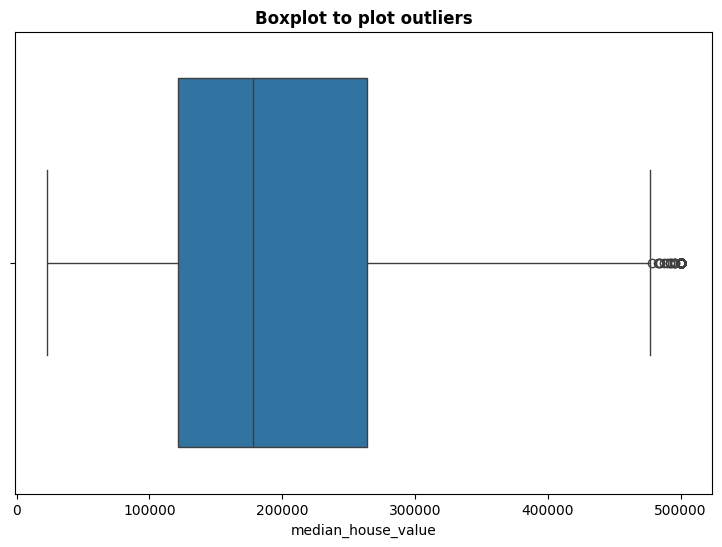

In [12]:
# Vẽ boxplot
plt.figure(figsize=(9, 6))
sns.boxplot(
    data=df,
    x='median_house_value',
    legend=True
)

plt.title("Boxplot to plot outliers", fontweight='bold')

### Nhận xét

PHÂN TÍCH SỐ LIỆU
Số lượng giá trị tập trung ở mức $500000: 175, chiếm 5.83%

THỐNG KÊ MÔ TẢ:
count      3000.00000
mean     205846.27500
std      113119.68747
min       22500.00000
25%      121200.00000
50%      177650.00000
75%      263975.00000
max      500001.00000
Name: median_house_value, dtype: float64

NHẬN XÉT VÀ ĐỀ XUẤT:
• Nhận xét:
- Nhiều giá trị tập trung ở mức $500,000 là do giới hạn trên của dữ liệu, không phải lỗi. Do giới hạn này nên các giá trị lớn hơn $500000đều bị cắt xuống thành $500000
- Nguyên nhân: Có thể do giới hạn khảo sát tại thời điểm thu thập dữ liệu

• Đề xuất:
   - Không nên loại bỏ vì đây không phải lỗi dữ liệu
   - Nên giữ nguyên nhưng ghi chú về giới hạn trên của dữ liệu trongphân tích
   - Xem xét phân tích riêng cho nhóm giá < 500,000


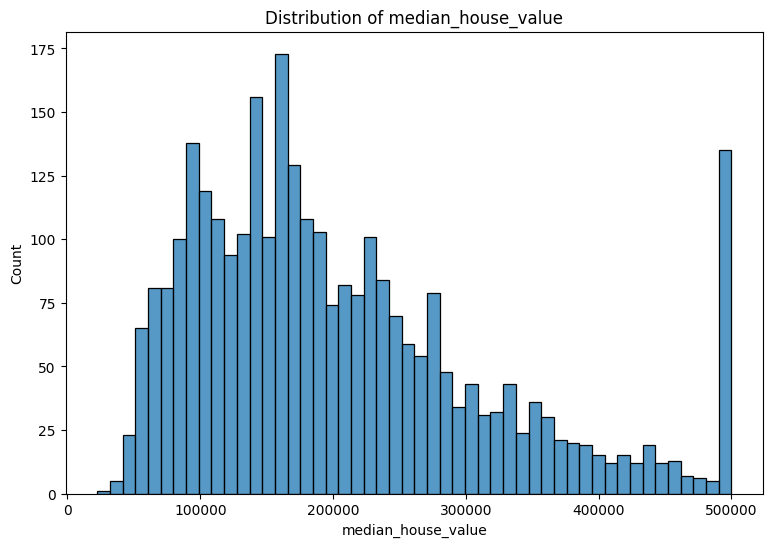

In [13]:
# Vẽ histogram để phân tích phân phối
plt.figure(figsize=(9, 6))

sns.histplot(
    data=df,
    x='median_house_value',
    bins=50
)

plt.title('Distribution of median_house_value')

# Phân tích số liệu
print("PHÂN TÍCH SỐ LIỆU")
print("=" * 50)

total = len(df)
house_value = df['median_house_value']

# Xét dao động quanh mức $50000
n_500k = len(df[(house_value >= 450000) & (house_value <= 550000)])
proportion = (n_500k / total) * 100

print(f"Số lượng giá trị tập trung ở mức $500000: {n_500k}, chiếm {proportion:.2f}%\n")

# Thống kê mô tả
print("THỐNG KÊ MÔ TẢ:")
print("=" * 50)
print(house_value.describe())

# Nhận xét và đề xuất xử lý
print("\nNHẬN XÉT VÀ ĐỀ XUẤT:")
print("=" * 50)
print("• Nhận xét:")
print("- Nhiều giá trị tập trung ở mức $500,000 là do giới hạn trên của dữ " \
      "liệu, không phải lỗi. Do giới hạn này nên các giá trị lớn hơn $500000" \
      "đều bị cắt xuống thành $500000")
print("- Nguyên nhân: Có thể do giới hạn khảo sát tại thời điểm thu thập " \
      "dữ liệu\n")
print("• Đề xuất:")
print("   - Không nên loại bỏ vì đây không phải lỗi dữ liệu")
print("   - Nên giữ nguyên nhưng ghi chú về giới hạn trên của dữ liệu trong" \
      "phân tích")
print("   - Xem xét phân tích riêng cho nhóm giá < 500,000")